In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [3]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [18]:
history=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6709 - accuracy: 0.8306 - val_loss: 0.3644 - val_accuracy: 0.9014
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3425 - accuracy: 0.9042 - val_loss: 0.2988 - val_accuracy: 0.9183
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2957 - accuracy: 0.9167 - val_loss: 0.2693 - val_accuracy: 0.9245
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2669 - accuracy: 0.9245 - val_loss: 0.2482 - val_accuracy: 0.9296
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2447 - accuracy: 0.9318 - val_loss: 0.2310 - val_accuracy: 0.9340
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2259 - accuracy: 0.9366 - val_loss: 0.2181 - val_accuracy: 0.9385
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2100 - accuracy: 0.9416 - val_loss: 0.2018 - val_accuracy:

In [19]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1702 - accuracy: 0.9517
Loss=0.170
Accuracy=0.952


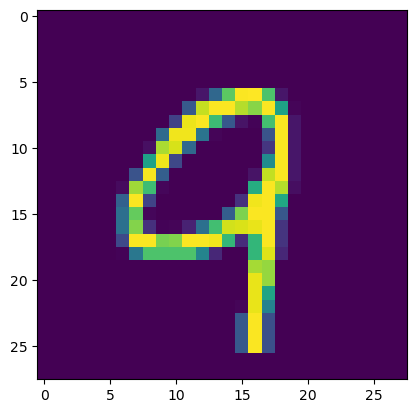

313/313 [==============================] - 1s 4ms/step


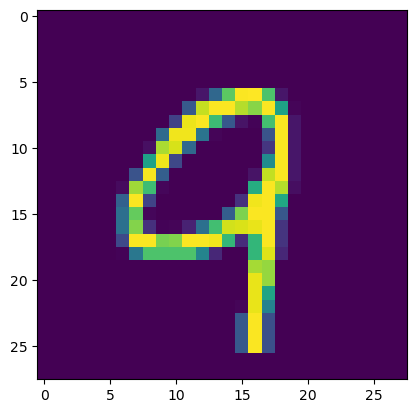

Predicted value: [5.7325047e-05 4.9833866e-06 3.1118782e-03 1.3714042e-04 9.3845744e-03
 1.1671980e-04 9.4011048e-05 5.5681565e-03 2.8408514e-03 9.7868437e-01]


In [21]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print('Predicted value:', predicted_value[n])

<function matplotlib.pyplot.show(close=None, block=None)>

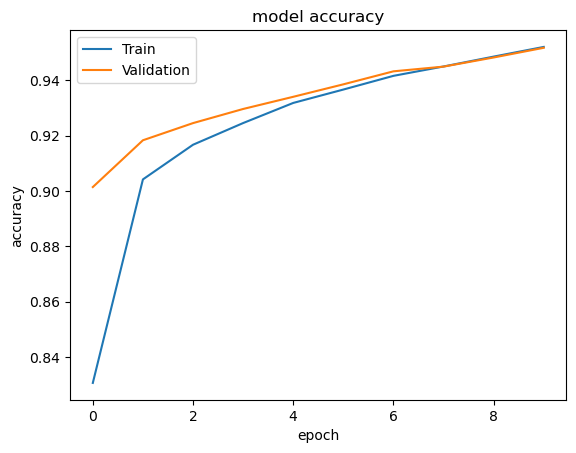

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

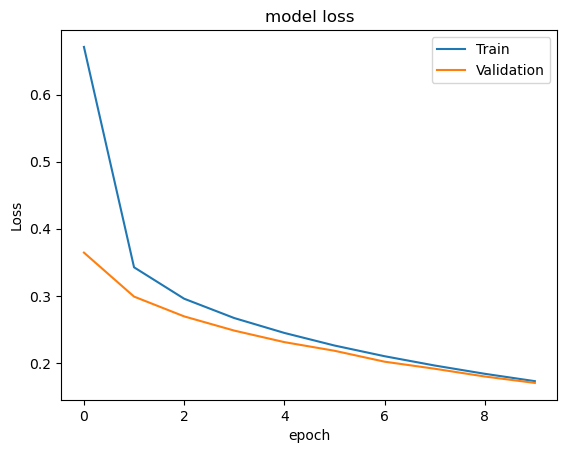

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show